In [10]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm


In [11]:
df = pd.read_csv("weights.csv", index_col=0, sep="\t")
df

,weight
date,
20.05.2022,94.4
21.05.2022,93.0
22.05.2022,93.4
23.05.2022,93.4
24.05.2022,93.1
...,...
16.08.2022,82.9
17.08.2022,82.5
18.08.2022,82.5


In [12]:
major_ticks = range(0, len(df.index), 7)
labels = [df.index[x] for x in major_ticks]

/var/folders/9g/mqzwzmzx4l18jxtqyfpcyydw0000gn/T/ipykernel_25585/424862022.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = result.params[0]
/var/folders/9g/mqzwzmzx4l18jxtqyfpcyydw0000gn/T/ipykernel_25585/424862022.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  gradient = result.params[1]


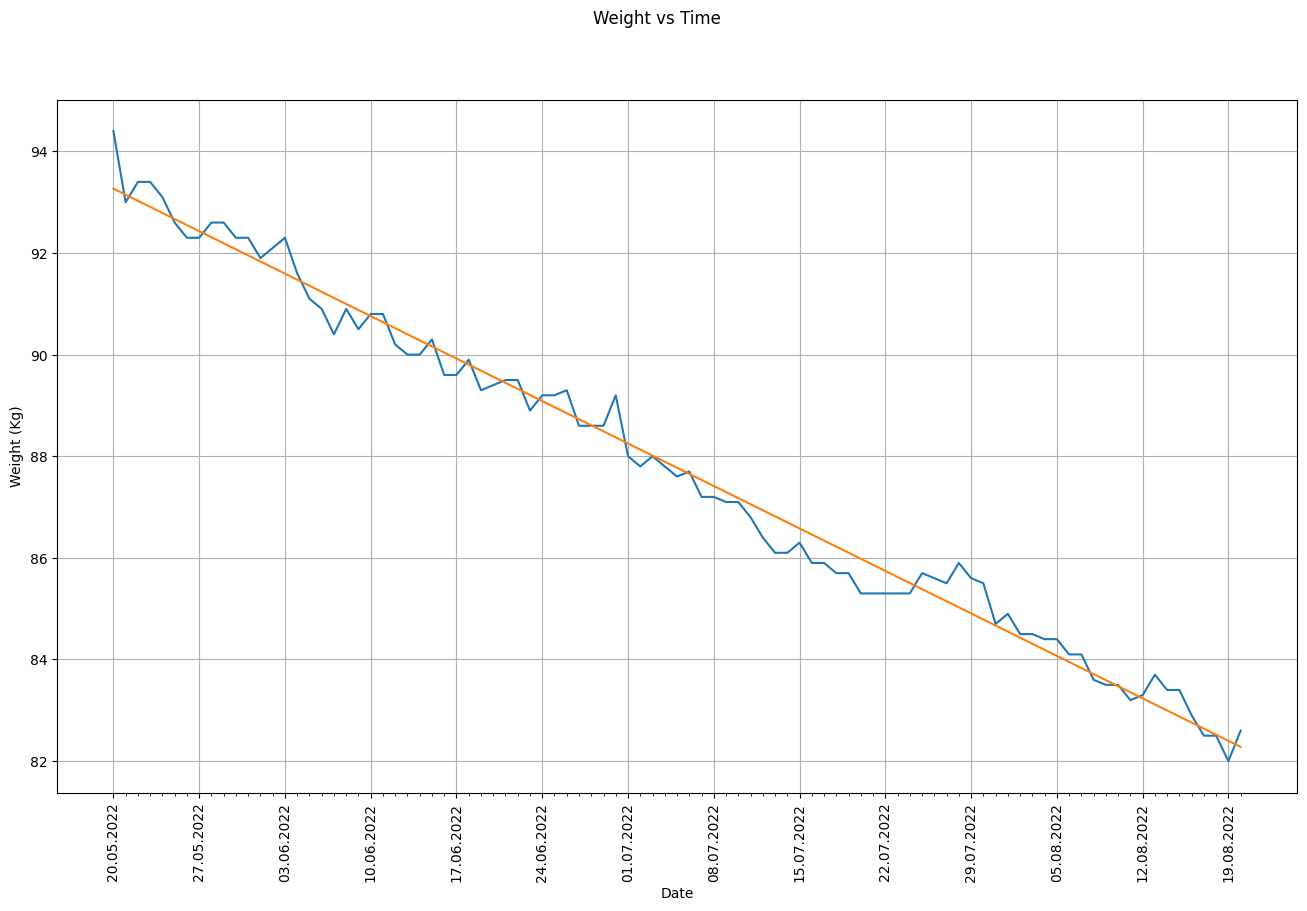

In [14]:
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot()

ax.set_xticks(ticks=major_ticks, labels=labels, rotation="vertical", minor=False)
ax.set_xticks(ticks=range(len(df.index)), minor=True) # minor is the ticks inbetween major e.g |.....|...
ax.tick_params(axis="x", which="major", labelsize=10)
ax.tick_params(axis="x", which="minor", labelsize=4)
fig.suptitle("Weight vs Time")
ax.grid()

ax.set_xlabel("Date")
ax.set_ylabel("Weight (Kg)")

# line
x = np.arange(len(df.index))

X = sm.add_constant(x)
model = sm.OLS(df["weight"], X) # OLS = Ordinary Least Square
result = model.fit()

intercept = result.params[0]
gradient = result.params[1]

y = intercept + gradient * x


ax.plot(df.index, df["weight"])
ax.plot(x, y)
plt.show()

